## HELP International Clustering of Countries Exercise

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

#to perform the PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform the hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

#To caluculate the Silhoutte score 
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans


# for the Heirarchial Clustering technique
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Reading the data into the dataframe data
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Checking the shape of the dataset
data.shape

(167, 10)

In [4]:
#Checking the nature of data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#Getting another copy of the data into new dataset called data2
data2 = data.copy(deep = True)

In [6]:
#dropping the country column  as twe dont need it in the unsupervised learning
data2.drop('country', axis =1, inplace =True)

In [7]:
data2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
#checking the null if there are present in the dataset
data2.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Clearly there are no mussing values in the dataset, so there is no need of dropping off any rows becuase of unavailability of data

In [9]:
#Checking for the data statiscal behaviour
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 11.8 KB


In [10]:
data2.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Derived metrics: columns : exports, health, imports are caluculated as percentage of the gdp. But we dont have the GDP in the dataset. so we can consider them as the % of Gdpp and proceed to calulcate the absolute values

The effect of the deriving the absolute metrics shall be minimal anywas because we will scale the data to get every feature in relatively same basis

In [11]:
data2['Exports'] = data2['gdpp']*data2['exports']/100
data2['Imports'] = data2['gdpp']*data2['imports']/100
data2['Health'] = data2['gdpp']*data2['health']/100


In [12]:
data2[['Exports', 'exports', 'Imports', 'imports', 'Health', 'health']].describe()

,Exports,exports,Imports,imports,Health,health
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,41.108976,6588.352108,46.890215,1056.733204,6.815689
std,17973.885795,27.412010,14710.810418,24.209589,1801.408906,2.746837
min,1.076920,0.109000,0.651092,0.065900,12.821200,1.810000
25%,447.140000,23.800000,640.215000,30.200000,78.535500,4.920000
50%,1777.440000,35.000000,2045.580000,43.300000,321.886000,6.320000
75%,7278.000000,51.350000,7719.600000,58.750000,976.940000,8.600000
max,183750.000000,200.000000,149100.000000,174.000000,8663.600000,17.900000


In [13]:
data2.drop(['exports','imports','health'], axis =1 , inplace = True)

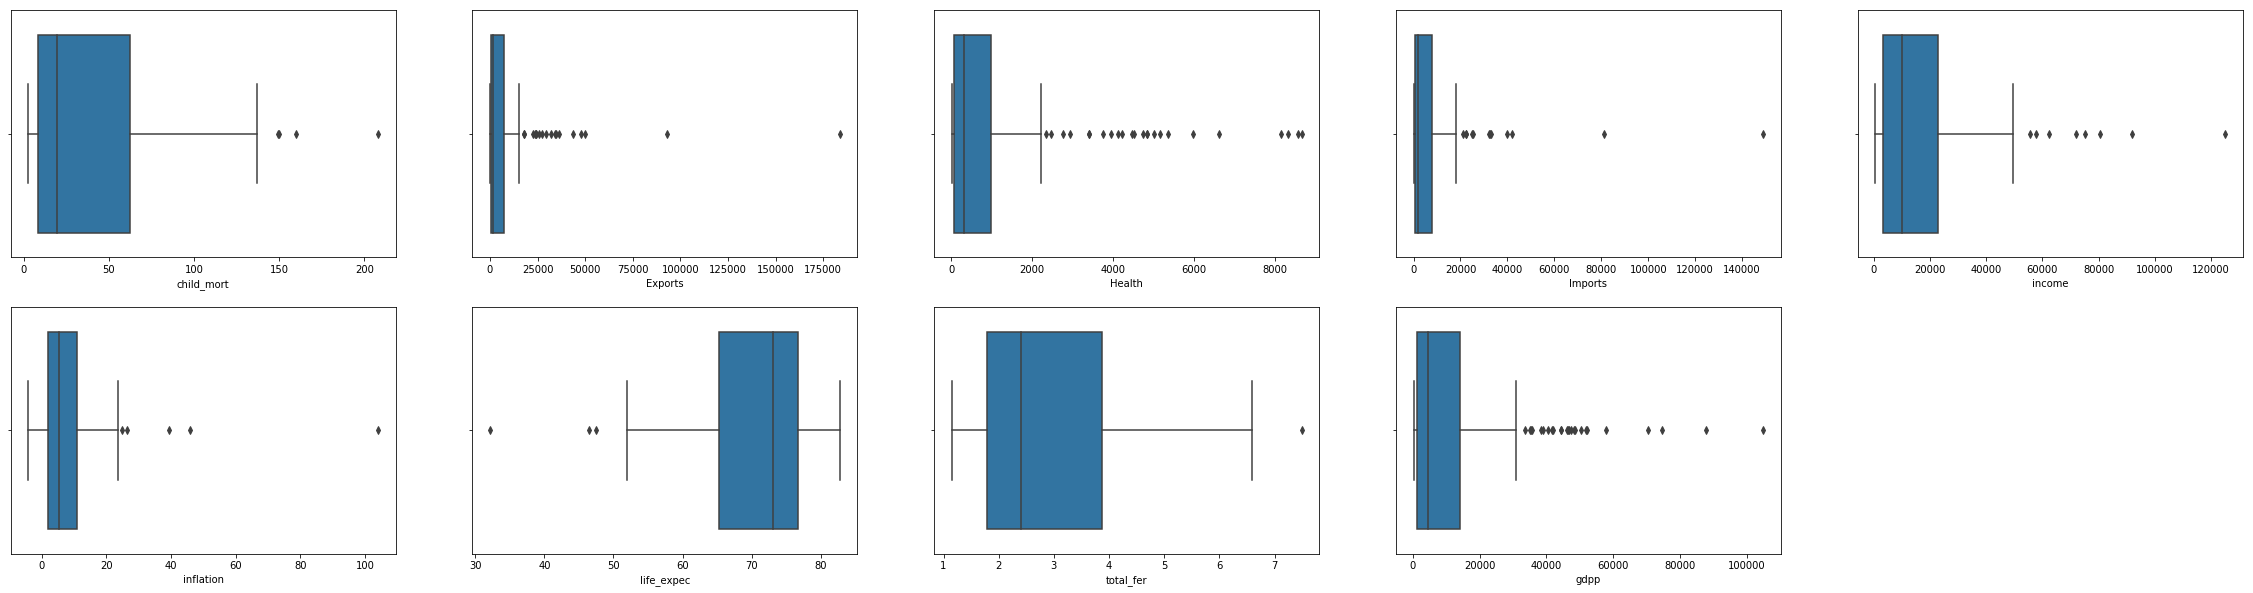

In [14]:
var = ['child_mort', 'Exports', 'Health', 'Imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize = (40,10))
for i in enumerate(var):
    plt.subplot(2,5,i[0]+1)
    sns.boxplot(x= i[1], data = data2)

We can clearly see that there are outliers present in the child_mort, exports, health, imports, income, inflation, lifeexpectancy, total_fer, gdpp.It is also observed that we have lot of outliers in the gdpp as the these high gdpp countries possibly be considered as as cluster when we do the K Means and Heirarchial Clustering. So, we dont want to remove outliers

## PCA

In [15]:
#Scaling the data
scaler = StandardScaler()
data3 = scaler.fit_transform(data2)

In [16]:
data3

array([[ 1.29153238, -0.8082454 ,  0.15733622, ..., -0.4110113 ,
        -0.4322755 , -0.56503989],
       [-0.5389489 , -0.3753689 , -0.31234747, ..., -0.35019096,
        -0.31367739, -0.43921769],
       [-0.27283273, -0.22084447,  0.78927429, ..., -0.31852577,
        -0.35372048, -0.48482608],
       ...,
       [-0.37231541, -0.65840354,  0.40973191, ..., -0.36146329,
        -0.37757179, -0.53848844],
       [ 0.44841668, -0.65892382,  1.50091625, ..., -0.39216643,
        -0.41847942, -0.55059641],
       [ 1.11495062, -0.72135793,  0.59001454, ..., -0.38395214,
        -0.41844533, -0.54049845]])

In [17]:
#Checking the variance of different featurese in the original dataset
data2.var()*100/sum(data2.var()) 
# here we can see that the income, gdpp are the main columns which has high variance in the data

child_mort    1.300825e-04
income        2.972436e+01
inflation     8.937032e-06
life_expec    6.325559e-06
total_fer     1.832947e-07
gdpp          2.686885e+01
Exports       2.583863e+01
Imports       1.730847e+01
Health        2.595435e-01
dtype: float64

In [18]:
#finding out the Principal components by running PCA using svd_solver for having more robust analysis
#Importing the PCA module
pca = PCA(svd_solver = 'randomized', random_state= 42)
pca.fit(data3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
#Eigen Vectors for the Dataset after the PCA
pca.components_

array([[-0.31639186,  0.38004113, -0.14308531,  0.34385651, -0.30284224,
         0.39998795,  0.34288671,  0.34486492,  0.358535  ],
       [ 0.47626735,  0.12838448,  0.22126089, -0.36981973,  0.4597152 ,
         0.2006241 ,  0.39731091,  0.37078075,  0.1550529 ],
       [-0.15001225,  0.14576421,  0.94841868,  0.19675173, -0.07783431,
         0.01033941, -0.03057367, -0.07217386, -0.07570322],
       [-0.14805195, -0.15480592, -0.00762798, -0.01839465, -0.21392805,
        -0.36477239,  0.44942527,  0.46179779, -0.59971228],
       [ 0.1019948 ,  0.79407469, -0.13642345, -0.15404105, -0.02033568,
         0.08750149, -0.03853829, -0.2527867 , -0.49319984],
       [ 0.19658519, -0.03814681,  0.10840284, -0.58600986, -0.75390075,
         0.04538167, -0.03891112, -0.01217988,  0.18069888],
       [ 0.76126725, -0.02311312, -0.02207663,  0.58120846, -0.27314534,
        -0.04402264, -0.01366973,  0.02718244, -0.06461567],
       [ 0.00644411,  0.3938113 , -0.00607016,  0.002966  ,  0

In [20]:
#to find out the which components are explaining the most variance in the data
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0,0.5,'Cumulative Variance')

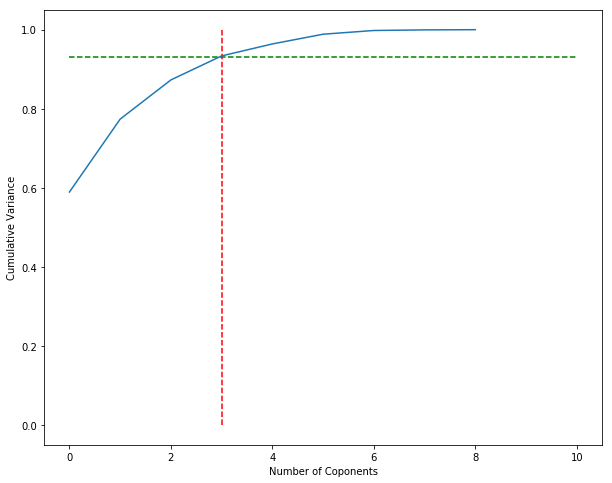

In [21]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=10, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

93% of the variance is being explained by the first 3 Principle components as per the screeplot
so performing the PCA with 3 components

In [22]:
#Rinning PCA for the 3 components as per the conclusion above
pca_final = IncrementalPCA(n_components=3)

In [23]:
#transforming the data here
df_pca = pca_final.fit_transform(data3)
df_pca.shape

(167, 3)

In [24]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2]})

In [25]:
pca_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [26]:
#adding the country column back to the pca_df2
pca_df2 = pd.DataFrame({'country': data['country'], 'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2]})
pca_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


### Clustering

In [27]:
#for hopkins Statistics:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
#checking the Hopkins measure
hopkins(pca_df2.drop('country', axis=1))

0.9330086462996037

we are gettting the hopkins statistic value more than 0.80 cosistently(have ran 10 times), which tells is that the data set is good for clustering

In [29]:
#Dropping the country column to perform the clustering again
data3 = pca_df2.drop('country', axis = 1)

In [30]:
data3.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


### Performing the K- Means Clustering

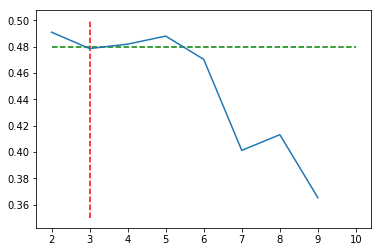

In [31]:
#Performing the silhoutte analysis and followed by the Elbow Curve for deciding the optimal number of clusters
ss = []
for k in range(2, 10):
    kmean = KMeans(n_clusters = k, random_state=10).fit(data3)
    ss.append([k, silhouette_score(data3, kmean.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.vlines(x=3, ymax=0.5, ymin=0.35, colors="r", linestyles="--")
plt.hlines(y=0.48, xmax=10, xmin=2, colors="g", linestyles="--")

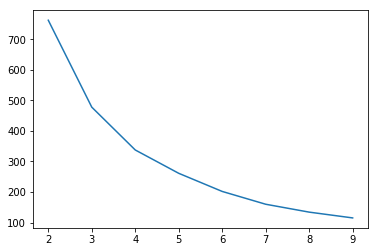

In [32]:
#Plotting the elbow plot for deciding the optimal number of the clusters
ssd = []
for k in range(2, 10):
    kmean = KMeans(n_clusters = k).fit(data3)
    ssd.append([k, kmean.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

Proceeding with the 3 clusters as per the Sillhoutte Score(0.48) and the Elbow plot

In [33]:
#Performing K-Means Clustering using the k=3 
model_kmean = KMeans(n_clusters= 3, random_state= 50).fit(data3)

In [34]:
#Adding the Clsuter IDs to the PCs data
data_km = pd.concat([pca_df2.reset_index().drop('index', axis =1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis = 1)], axis =1)

In [35]:
data_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'ClusterID']

In [36]:
data_km['ClusterID'].value_counts()

1    92
2    48
0    27
Name: ClusterID, dtype: int64

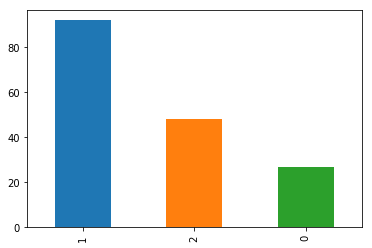

In [37]:
# Check the count of observation per cluster
data_km['ClusterID'].value_counts().plot(kind ='bar')

In [38]:
data_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Albania,-0.022277,-1.431896,-0.020701,1
2,Algeria,-0.457626,-0.673301,0.961867,1
3,Angola,-2.724520,2.174583,0.606687,2
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1


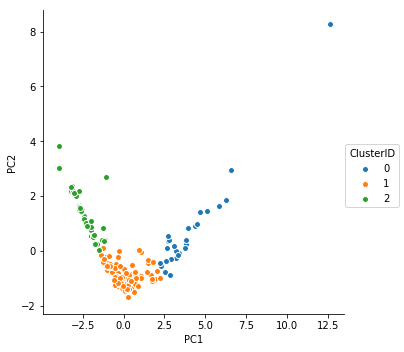

In [39]:
# Plot the Cluster with respect to the clusters obtained
sns.pairplot(data = data_km, x_vars= ["PC1"], y_vars= ["PC2"], hue = "ClusterID", size = 5)

### Cluster Profiling

In [40]:
data2['country'] = data['country']

In [41]:
data4 = pd.merge(data2, data_km[['country','ClusterID']], on = 'country')

In [42]:
data4.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health,country,ClusterID
0,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,Afghanistan,2
1,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,Albania,1
2,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,Algeria,1
3,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,Angola,2
4,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,Antigua and Barbuda,1


Till now we have created the new principle components and performed the K means clustering on the base of the PCs, followed by assigning the cluster ids acheived back to the original dataset

### Analysis of the Clusters

Text(0.5,1,'Plot1')

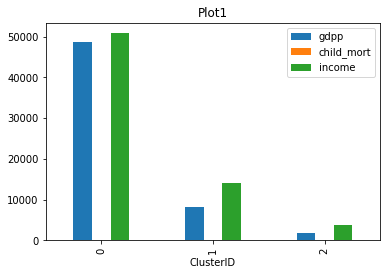

In [43]:
data4[['gdpp','child_mort','income', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')
plt.title("Plot1")

Text(0.5,1,'Plot2')

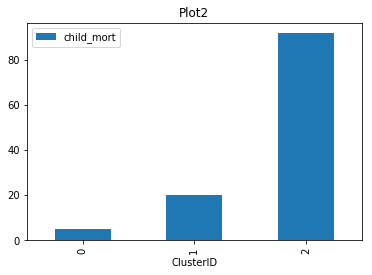

In [44]:
data4[['child_mort', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')
plt.title("Plot2")

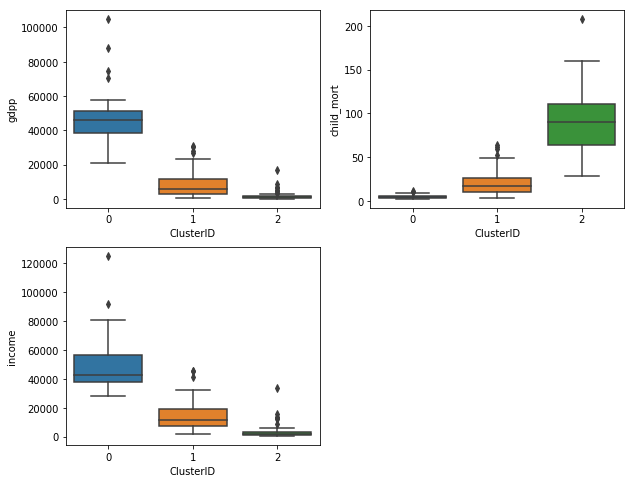

In [45]:
var = ['gdpp','child_mort','income']
plt.figure(figsize = (10,8))
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1] , data = data4)

From the above plots : Plot 1 : as the Child mortality is very very less compared to the income and the gdpp we were not able to see the representation of the child mortality, so plotted the average values of the child mortality in the plot2 with respect to ClusterID

This clearly explain how the clusters are divided by the K-Means Clustering:
- Cluster 0 : These are the Rich/ High Income(/gdpp) countries with almost less than 10 children dying within the 5 years of birth. This indicates the reach of health and food facilities in the cluster 0 countries
- Cluster 1 : These re the middle/ Avg Income(/gdpp) countries with on average 20+ children dies within the 5 years of birth. The health and food facilities could be below than that of the Rich countires 
- Cluster 2 : These are the poor countries with very low Income and very low gdpp relative to the countires in cluster 0 & 1. With the child mortality more than 80/90. these are the countries which could be having the least reach of health, snitation and food facilities

In [46]:
#So the name of the countries which are belonging the to the cluster 2 are: Total of 48 Countries

data4[data4['ClusterID'] ==2].sort_values(by = [ 'gdpp','child_mort','income', 'Health'], ascending = [True, False, True, True]).head(10)

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health,country,ClusterID
26,93.6,764,12.30,57.7,6.26,231,20.6052,90.552,26.7960,Burundi,2
88,89.3,700,5.47,60.8,5.02,327,62.4570,302.802,38.5860,Liberia,2
37,116.0,609,20.80,57.5,6.54,334,137.2740,165.664,26.4194,"Congo, Dem. Rep.",2
112,123.0,814,2.55,58.8,7.49,348,77.2560,170.868,17.9568,Niger,2
132,160.0,1220,17.20,55.0,5.20,399,67.0320,137.655,52.2690,Sierra Leone,2
93,62.2,1390,8.79,60.8,4.60,413,103.2500,177.590,15.5701,Madagascar,2
106,101.0,918,7.64,54.5,5.56,419,131.9850,193.578,21.8299,Mozambique,2
31,149.0,888,2.01,47.5,5.21,446,52.6280,118.190,17.7508,Central African Republic,2
94,90.5,1030,12.10,53.1,5.31,459,104.6520,160.191,30.2481,Malawi,2
50,55.2,1420,11.60,61.7,4.61,482,23.0878,112.306,12.8212,Eritrea,2


Above we have made a list of the countries whcih fall under the Cluster 2(poor countries) which are in dier need of the Aid from NGOs. 
- List is curated as per the socio economic condition adn the Health Spend of the coutries

we have top 10 countries which are having least gdpp, most child mortality rates and least income countries whcih we our NGO can focus on.
Countries:
-   Burundi,
-   Liberia,
-   Congo, Dem. Rep.,
-   Niger,
-   Sierra Leone,
-   Madagascar,
-   Mozambique,
-   Central African Republic,
-   Malawi,
-   Eritrea

## Heirarchial Clustering

In [47]:
data3.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [48]:
data4.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health,country,ClusterID
0,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,Afghanistan,2
1,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,Albania,1
2,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,Algeria,1
3,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,Angola,2
4,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,Antigua and Barbuda,1


In [49]:
#Single linkage
mergings = linkage(data3, method = "single", metric = 'euclidean')

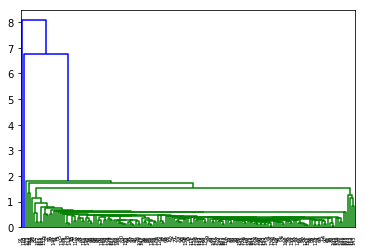

In [50]:
dendrogram(mergings)
plt.show()

This absolutely is not readable and lets try with the complete linkage

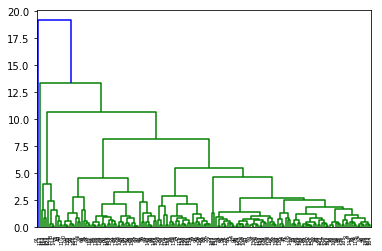

In [51]:
#complete linkage
mergings = linkage(data3, method = "complete", metric = 'euclidean')
dendrogram(mergings)
plt.show()

After the 5 iterations it is found that the optimal number of clusters being observed in the Hierarchial Clustering is 5 and it is representing the countries into meaningfull cluster from 5 clusters with some decent number of countries into every cluster

In [52]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [53]:
# assign cluster labels
data4['cluster_labels_heirarchial'] = cluster_labels
data4.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health,country,ClusterID,cluster_labels_heirarchial
0,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,Afghanistan,2,0
1,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,Albania,1,1
2,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,Algeria,1,1
3,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,Angola,2,0
4,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,Antigua and Barbuda,1,1


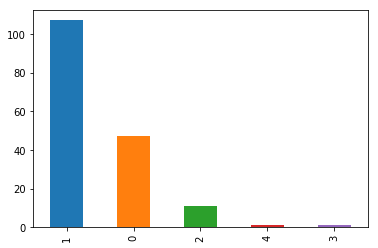

In [54]:
# Check the count of observation per cluster
data4['cluster_labels_heirarchial'].value_counts().plot(kind ='bar')

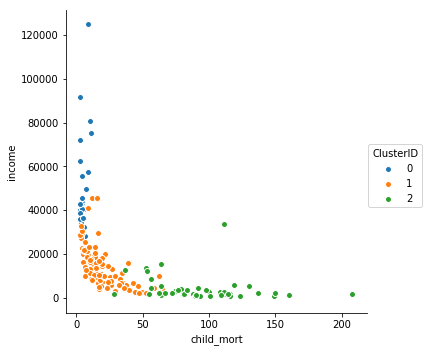

In [55]:
# Plot the Cluster with respect to the clusters obtained on Child_mort vs. income
sns.pairplot(data = data4, x_vars= ["child_mort"], y_vars= ["income"], hue = "ClusterID", size = 5)

In [56]:
# To find out how countries are clusterd as:
data4['cluster_labels_heirarchial'].value_counts()

1    107
0     47
2     11
4      1
3      1
Name: cluster_labels_heirarchial, dtype: int64

Text(0.5,1,'Plot1')

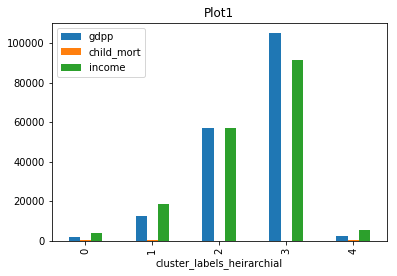

In [57]:
data4[['gdpp','child_mort','income', 'cluster_labels_heirarchial']].groupby('cluster_labels_heirarchial').mean().plot(kind = 'bar')
plt.title("Plot1")

Text(0.5,1,'Plot2')

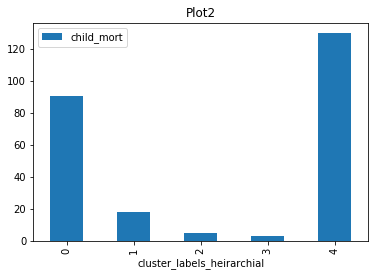

In [58]:
data4[['child_mort','cluster_labels_heirarchial']].groupby('cluster_labels_heirarchial').mean().plot(kind = 'bar')
plt.title("Plot2")

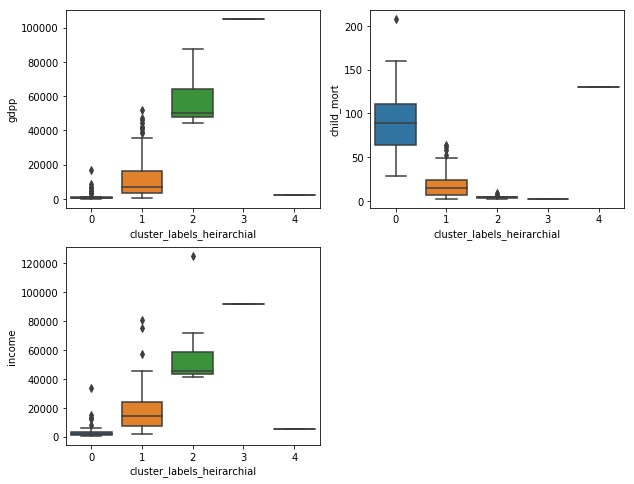

In [59]:
var = ['gdpp','child_mort','income']
plt.figure(figsize = (10,8))
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_labels_heirarchial', y = i[1] , data = data4)

### Inferences from Heirarchial Clustering:
We have clustered the data into 5 clusters, here are the observartions from the clusters
- The Clusters 0 and 4 are having the least income and gdpp, relatively high child mortality 
- The Clusters 2 and 3 are having the better income and gdpp and relatively low child mortality
- The cluster 1 looks like mostly the middle income, gdpp and considerable child mortality countries

NGO can focus on the cluster 0 and 4.

#### Cluster Profiling based on the Hierarchial clustering

In [60]:
filter1 = data4['cluster_labels_heirarchial'] ==4
filter2 = data4['cluster_labels_heirarchial'] ==0

data4[filter1 | filter2].sort_values(by = [ 'gdpp','child_mort','income', 'Health'], ascending = [True, False, True, True]).head(10)

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health,country,ClusterID,cluster_labels_heirarchial
26,93.6,764,12.30,57.7,6.26,231,20.6052,90.552,26.7960,Burundi,2,0
88,89.3,700,5.47,60.8,5.02,327,62.4570,302.802,38.5860,Liberia,2,0
37,116.0,609,20.80,57.5,6.54,334,137.2740,165.664,26.4194,"Congo, Dem. Rep.",2,0
112,123.0,814,2.55,58.8,7.49,348,77.2560,170.868,17.9568,Niger,2,0
132,160.0,1220,17.20,55.0,5.20,399,67.0320,137.655,52.2690,Sierra Leone,2,0
93,62.2,1390,8.79,60.8,4.60,413,103.2500,177.590,15.5701,Madagascar,2,0
106,101.0,918,7.64,54.5,5.56,419,131.9850,193.578,21.8299,Mozambique,2,0
31,149.0,888,2.01,47.5,5.21,446,52.6280,118.190,17.7508,Central African Republic,2,0
94,90.5,1030,12.10,53.1,5.31,459,104.6520,160.191,30.2481,Malawi,2,0
50,55.2,1420,11.60,61.7,4.61,482,23.0878,112.306,12.8212,Eritrea,2,0


### Inferences:
If we observe one thing here all the top 10 countries we have decided that NGO should focus on based on the K-Means Clustering are also present in the Heirarchial Clustering cluster also(all in cluster 0). Here are the list of the countires for reference again:

-   Burundi,
-   Liberia,
-   Congo, Dem. Rep.,
-   Niger,
-   Sierra Leone,
-   Madagascar,
-   Mozambique,
-   Central African Republic,
-   Malawi,
-   Eritrea